In [132]:
# Importing all the necessary libraries (Hidden Input)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score,ConfusionMatrixDisplay, confusion_matrix, roc_curve
import scikitplot as skplt
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
%matplotlib inline

In [133]:
# Importing the data and looking at the first ten rows (Hidden Input)

df = pd.read_csv('/kaggle/input/credit-card-customers/BankChurners.csv')


In [134]:
# Dropping the last two columns and the client number column

df = df.iloc[:,1:-2]

In [135]:
# Checking for the number of null values present in each feature

round((df.isnull().sum() * 100)/(df.shape[0]),2)

Attrition_Flag              0.0
Customer_Age                0.0
Gender                      0.0
Dependent_count             0.0
Education_Level             0.0
Marital_Status              0.0
Income_Category             0.0
Card_Category               0.0
Months_on_book              0.0
Total_Relationship_Count    0.0
Months_Inactive_12_mon      0.0
Contacts_Count_12_mon       0.0
Credit_Limit                0.0
Total_Revolving_Bal         0.0
Avg_Open_To_Buy             0.0
Total_Amt_Chng_Q4_Q1        0.0
Total_Trans_Amt             0.0
Total_Trans_Ct              0.0
Total_Ct_Chng_Q4_Q1         0.0
Avg_Utilization_Ratio       0.0
dtype: float64

In [136]:
# Checking the Descriptive statistics of the numerical columns (Hidden Input)

df.describe().T.style.bar(
    subset=['mean'],
    color='lightsalmon').background_gradient(
    subset=['std'], cmap='plasma').background_gradient(subset=['75%'], cmap='plasma').background_gradient(
    subset=['max'], cmap='plasma')

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.000000,46.325960,8.016814,26.000000,41.000000,46.000000,52.000000,73.000000
Dependent_count,10127.000000,2.346203,1.298908,0.000000,1.000000,2.000000,3.000000,5.000000
Months_on_book,10127.000000,35.928409,7.986416,13.000000,31.000000,36.000000,40.000000,56.000000
Total_Relationship_Count,10127.000000,3.812580,1.554408,1.000000,3.000000,4.000000,5.000000,6.000000
Months_Inactive_12_mon,10127.000000,2.341167,1.010622,0.000000,2.000000,2.000000,3.000000,6.000000
Contacts_Count_12_mon,10127.000000,2.455317,1.106225,0.000000,2.000000,2.000000,3.000000,6.000000
Credit_Limit,10127.000000,8631.953698,9088.776650,1438.300000,2555.000000,4549.000000,11067.500000,34516.000000
Total_Revolving_Bal,10127.000000,1162.814061,814.987335,0.000000,359.000000,1276.000000,1784.000000,2517.000000
Avg_Open_To_Buy,10127.000000,7469.139637,9090.685324,3.000000,1324.500000,3474.000000,9859.000000,34516.000000
Total_Amt_Chng_Q4_Q1,10127.000000,0.759941,0.219207,0.000000,0.631000,0.736000,0.859000,3.397000


In [137]:
# Changing the Attrition_Flag to 0 and 1 (Hidden Input/Output)

df["Attrition_Flag"] = df["Attrition_Flag"].map({"Existing Customer":0, "Attrited Customer":1})

In [138]:
# Performing EDA on the Categorical columns (Hidden Input)

num_cols = list(df.select_dtypes(["int64","float64"]))
cat_cols = list(df.select_dtypes("object"))

In [139]:
# # Creating the dummy variables for all the categorical features

# for col in cat_cols:
#     dummy_cols = pd.get_dummies(df[col], drop_first=True, prefix=col)
#     df = pd.concat([df,dummy_cols],axis=1)
#     df.drop(columns=col, inplace=True)

In [140]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [141]:
y = df["Attrition_Flag"]
X = df.drop("Attrition_Flag", axis =1)
X = pd.get_dummies(X, columns=["Education_Level","Marital_Status","Income_Category","Card_Category","Gender"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [142]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_Age                    10127 non-null  int64  
 1   Dependent_count                 10127 non-null  int64  
 2   Months_on_book                  10127 non-null  int64  
 3   Total_Relationship_Count        10127 non-null  int64  
 4   Months_Inactive_12_mon          10127 non-null  int64  
 5   Contacts_Count_12_mon           10127 non-null  int64  
 6   Credit_Limit                    10127 non-null  float64
 7   Total_Revolving_Bal             10127 non-null  int64  
 8   Avg_Open_To_Buy                 10127 non-null  float64
 9   Total_Amt_Chng_Q4_Q1            10127 non-null  float64
 10  Total_Trans_Amt                 10127 non-null  int64  
 11  Total_Trans_Ct                  10127 non-null  int64  
 12  Total_Ct_Chng_Q4_Q1             

In [143]:
# # Splitting the data into train and test

# y = df.pop("Attrition_Flag")
# X = df
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=69)

In [144]:
X_train.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Gender_F,Gender_M
9066,54,1,36,1,3,3,3723.0,1728,1995.0,0.595,...,False,False,False,True,True,False,False,False,True,False
5814,58,4,48,1,4,3,5396.0,1803,3593.0,0.493,...,False,False,False,True,True,False,False,False,True,False
792,45,4,36,6,1,3,15987.0,1648,14339.0,0.732,...,False,False,True,False,False,True,False,False,True,False
1791,34,2,36,4,3,4,3625.0,2517,1108.0,1.158,...,False,False,True,False,True,False,False,False,True,False
5011,49,2,39,5,3,4,2720.0,1926,794.0,0.602,...,False,False,False,False,True,False,False,False,True,False


In [146]:
# Normalizing the data
req_cols = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
            'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
             'Total_Trans_Amt', 'Total_Trans_Ct','Card_Category_Blue', 'Card_Category_Gold','Card_Category_Platinum', 'Card_Category_Silver','Income_Category_$120K +', 
            'Income_Category_$40K - $60K','Income_Category_$60K - $80K','Income_Category_$80K - $120K' , 'Income_Category_Less than $40K', 'Gender_F','Gender_M',
           'Marital_Status_Divorced','Marital_Status_Married', 'Marital_Status_Single','Education_Level_College', 'Education_Level_Doctorate', 'Education_Level_Graduate',
           'Education_Level_High School','Education_Level_Post-Graduate','Education_Level_Uneducated']

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train[req_cols])

X_test = scaler.transform(X_test[req_cols])

In [147]:
X_train

array([[0.63636364, 0.2       , 0.53488372, ..., 0.        , 0.        ,
        0.        ],
       [0.72727273, 0.8       , 0.81395349, ..., 1.        , 0.        ,
        0.        ],
       [0.43181818, 0.8       , 0.53488372, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.36363636, 0.8       , 0.44186047, ..., 0.        , 0.        ,
        0.        ],
       [0.31818182, 0.6       , 0.34883721, ..., 0.        , 0.        ,
        0.        ],
       [0.61363636, 0.8       , 0.8372093 , ..., 1.        , 0.        ,
        0.        ]])

In [ ]:
# scaler = MinMaxScaler()

# X_train = scaler.fit_transform(X_train)

# X_test = scaler.transform(X_test)

In [148]:
import joblib

# Save the scaler to a file
joblib.dump(scaler, 'scaler_2.pkl')

['scaler_2.pkl']

In [149]:
# Applying SMOTE to handle imbalance in target variable

sm = SMOTE(random_state = 42, sampling_strategy = 1.0)

X_train, y_train = sm.fit_resample(X_train, y_train)

In [150]:
# XGBoost model

xgb_model = xgb.XGBClassifier(random_state=69, use_label_encoder=False, n_jobs=-1)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=69, ...)

In [151]:
# XGBoost Score on the test data

xgb_model.score(X_test, y_test)

0.9570582428430404

In [152]:
y_pred=xgb_model.predict(X_test)
print(y_pred[20])

0


In [153]:
# Checking the Classification Report (Hidden Input)

print(classification_report(y_test, xgb_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1699
           1       0.89      0.84      0.86       327

    accuracy                           0.96      2026
   macro avg       0.93      0.91      0.92      2026
weighted avg       0.96      0.96      0.96      2026



******************************
Accuracy : 0.9570582428430404
Precision : 0.9691501746216531
Recall : 0.9799882283696292
******************************


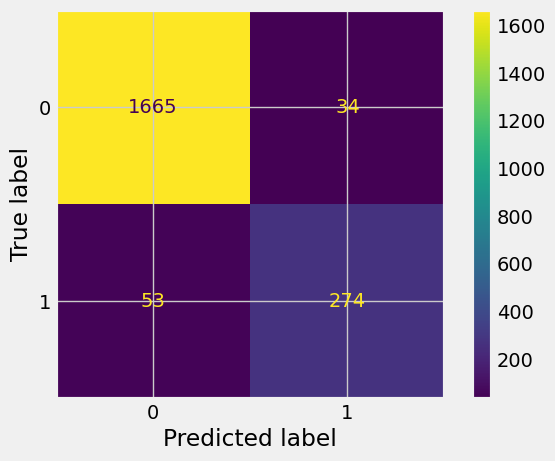

In [154]:
# Creating the Confusion Matrix (Hidden Input)

cfm = confusion_matrix(y_true=y_test, y_pred=xgb_model.predict(X_test))

TP = cfm[0][0]
FN = cfm[0][1]
FP = cfm[1][0]
TN = cfm[1][1]


#fig, ax = plt.subplots(figsize=(16, 8))
#plt.title("Confusion Matrix and Corresponding Accuracy, Precision and Recall", size=20, pad=20)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm)
# plt.grid(False)
disp.plot()
# plt.show()

print("*" * 30)
print("Accuracy :", (TP+TN)/(TP+TN+FP+FN))
print("Precision :", (TP)/(TP+FP))
print("Recall :", (TP)/(TP+FN))
print("*" * 30)

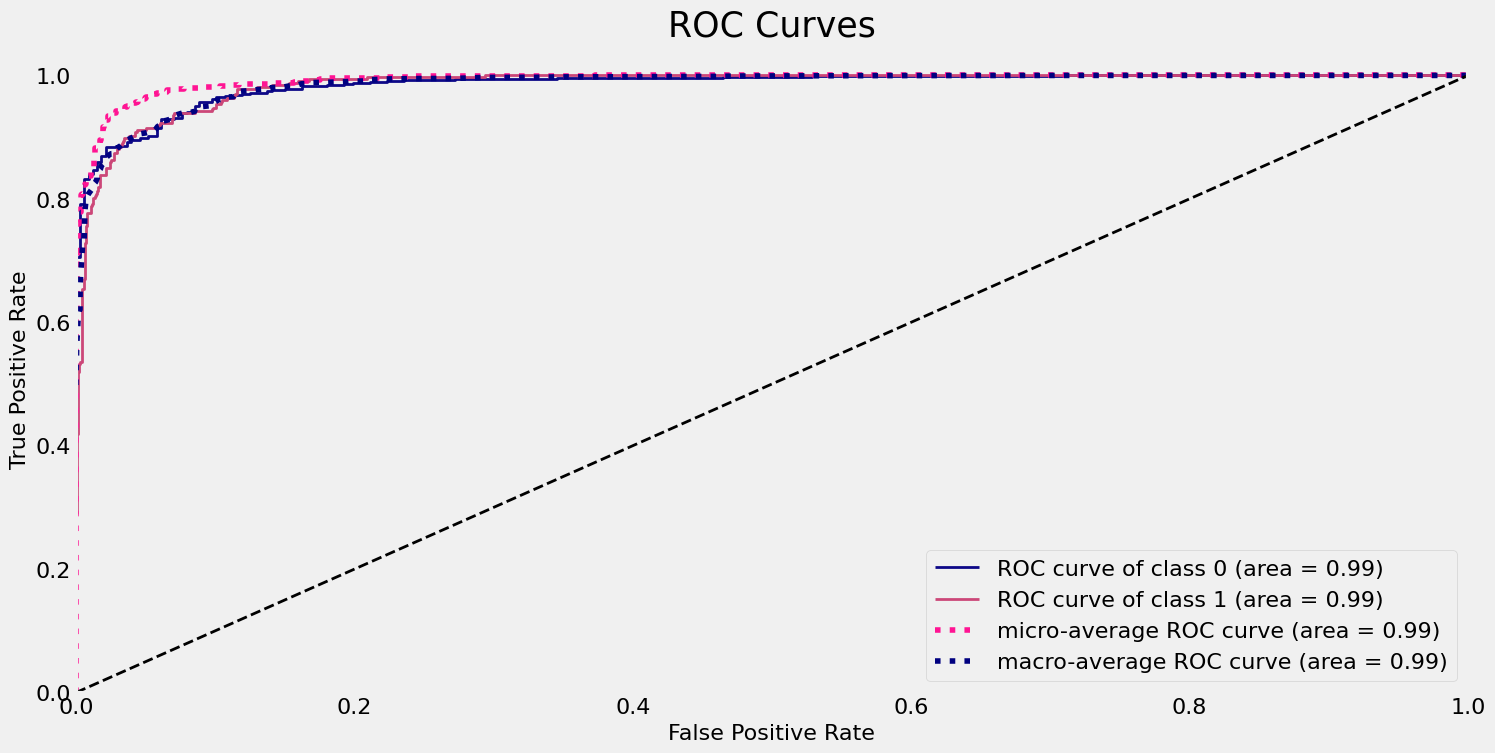

In [155]:
# Checking the roc_auc_curve (Hidden Input)

y_true = y_test # ground truth labels
y_probas = xgb_model.predict_proba(X_test) # predicted probabilities generated by sklearn classifier

skplt.metrics.plot_roc(y_true, y_probas, figsize=(16,8), title_fontsize=25, text_fontsize=16, cmap='plasma')
plt.grid(False)
plt.show()

In [156]:
import pickle

In [157]:
# Save the Model to file in the current working directory

Pkl_Filename = "Pickle_RL_Model_1.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(xgb_model, file)

In [158]:
print(X_test[2])

[0.25       0.4        0.53488372 0.6        0.5        0.5
 0.00893956 0.39213349 0.23461667 0.44186047 1.         0.
 0.         0.         0.         0.         0.         0.
 1.         1.         0.         1.         0.         0.
 0.         0.         1.         0.         0.         0.        ]


In [159]:
print(y_test)

3781    0
2922    0
5070    0
7246    0
623     0
       ..
1937    0
4705    1
8548    0
1346    0
8802    0
Name: Attrition_Flag, Length: 2026, dtype: int64
